# Review Sentiment Prediction

This is a binary classification problem where you need to predict whether the review sentiment is positive or negative

### Data Dictionary

 - **id**: Unique identifier for each tuple
 - **category**: The reviews have been categorized into two categories representing positive and negative reviews. 0 represents positive reviews and 1 represents negative reviews.
 - **text**: Tokenized text content of the review
 
### Evaluation Metric

 - Submissions are evaluated using [Precision_Score(Macro)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#:~:text=The%20precision%20is%20the%20ratio,the%20worst%20value%20is%200.)
 
 - e.g. ```precision_score(y_true, y_pred, average='macro')```

## 1. Import the packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample, shuffle

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

## 2. Read the data

Read training data for building machine learning models

In [2]:
df = pd.read_csv('TRAIN.csv')
df.head()

id                                               text  category
0  3973                       1047 6700 4178 2912 183 6700         0
1  4462  4035 4563 1994 154 5373 4956 6035 4393 4017 40...         1
2  2889         5035 7685 3139 4407 254 584 6589 8518 3078         0
3  3457  1047 2540 2578 6700 2242 230 3771 4676 5881 64...         0
4  1555                            7685 5868 237 6794 3078         0

Check the count of training data and observe data types of each features

In [3]:
df.shape

(2598, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        2598 non-null   int64 
 1   text      2598 non-null   object
 2   category  2598 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 50.8+ KB


## 3. EDA

### 3.1 Observe class distribution

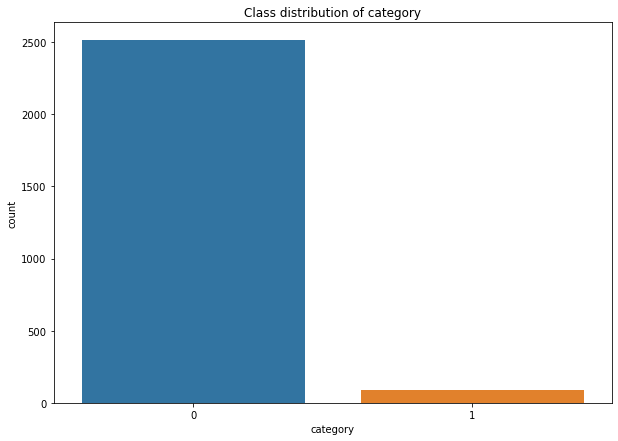

In [5]:
plt.figure(figsize=(10, 7))
plt.title('Class distribution of category')
sns.countplot(df['category'])
plt.show()

In [6]:
df['text'].head()

0                         1047 6700 4178 2912 183 6700
1    4035 4563 1994 154 5373 4956 6035 4393 4017 40...
2           5035 7685 3139 4407 254 584 6589 8518 3078
3    1047 2540 2578 6700 2242 230 3771 4676 5881 64...
4                              7685 5868 237 6794 3078
Name: text, dtype: object

### 3.2 Shuffle the data

In [7]:
# Shuffeling data
df = df.sample(frac=1).reset_index(drop=True)
df.head()

id                                               text  category
0  4408  590 724 5107 5121 4162 5773 187 5773 7087 8542...         0
1  2785  3919 5407 6084 6843 5071 2664 4032 634 3919 40...         0
2  3468  2610 230 8406 4450 7588 6700 4608 4799 5672 15...         0
3  3608  6084 6980 5551 8223 237 3225 4117 5773 5728 50...         0
4  1725  2734 2230 3160 8298 5335 230 226 5773 2977 586...         0

### 3.3 Split the data

In [8]:
train, test = train_test_split(df, test_size=0.20, stratify=df['category'], random_state=42)
print(train.shape, test.shape)

(2078, 3) (520, 3)


Try differenct vectorize methods to see the performance impact of each machine learning models

### 3.4 Trying Count Vectorizer:

In [9]:
cv = CountVectorizer(binary=True, min_df = 10, max_df = 0.95)
cv.fit_transform(train['text'].values)
X_train = cv.transform(train['text'].values)
X_test = cv.transform(test['text'].values)

print(X_train.shape, X_test.shape)

(2078, 512) (520, 512)


### 3.5 Trying TFIDF Vectorizer:

In [12]:
tfidf_v = TfidfVectorizer(use_idf=True, min_df=10, max_df=0.95)
tfidf_v.fit_transform(train['text'].values)
X_train = tfidf_v.transform(train['text'].values)
X_test = tfidf_v.transform(test['text'].values)

print(X_train.shape, X_test.shape)

(2078, 512) (520, 512)


### 3.6 Trying Hash Vectorizer:

In [11]:
hashv = HashingVectorizer(decode_error='ignore', alternate_sign=False)
hashv.fit_transform(train['text'].values)
X_train = hashv.transform(train['text'].values)
X_test = hashv.transform(test['text'].values)

print(X_train.shape, X_test.shape)

(2078, 1048576) (520, 1048576)


Separating target variables from train and test data

In [13]:
y_train = train['category'].values
y_test = test['category'].values

print(y_train.shape, y_test.shape)

(2078,) (520,)


## 4. Handle class imbalance

In [ ]:
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler

# oversample = RandomOverSampler(sampling_strategy='minority')
# X_over, y_over = oversample.fit_resample(X_train, y_train)

# X_train, y_train = X_over, y_over

In [14]:
# Applying SMOTE
from imblearn.over_sampling import SMOTE

print('Shape of train dataset before applying SMOTE:', X_train.shape)

X_train, y_train = SMOTE().fit_resample(X_train, y_train)

print('Shape of train dataset after applying SMOTE:', X_train.shape)

Shape of train dataset before applying SMOTE: (2078, 512)
Shape of train dataset after applying SMOTE: (4018, 512)


## 5. Build and evaluate the baseline model

### 5.1. Logistic Regression

In [15]:
# Initialize the logistic regression model
lr = LogisticRegression() #LogisticRegression(solver = 'liblinear', random_state = 42, max_iter=1000)

# Fit the data
lr.fit(X_train, y_train)

# Find out the predictions
y_pred = lr.predict(X_test)

# Evaluate the precision score
print('Training precision score: ', precision_score(y_train, lr.predict(X_train), average='macro'))
print('Validation precision score: ', precision_score(y_test, y_pred, average='macro'))

Training precision score:  0.9980134017336278
Validation precision score:  0.9636963696369637


### 5.2. Random Forest Classifier

In [16]:
# Initialize the the model
rf = RandomForestClassifier(max_features=10, n_estimators=24, random_state=42)

# Fit the data
rf.fit(X_train, y_train)

# Find out the predictions
y_pred = rf.predict(X_test)

# Evaluate the precision score
print('Training precision score: ', precision_score(y_train, rf.predict(X_train), average='macro'))
print('Validation precision score: ', precision_score(y_test, y_pred, average='macro'))

Training precision score:  0.9997512437810945
Validation precision score:  0.9912109375


### 5.3. XGBoost Classifier

In [17]:
# Initialize the the model
xgb = XGBClassifier(objective='binary:logistic')

# Fit the data
xgb.fit(X_train, y_train)

# Find out the predictions
y_pred = xgb.predict(X_test)

# Evaluate the precision score
print('Training precision score: ', precision_score(y_train, xgb.predict(X_train), average='macro'))
print('Validation precision score: ', precision_score(y_test, y_pred, average='macro'))

Training precision score:  0.9997512437810945
Validation precision score:  0.9603331451157539


### 5.4. SGD Classifier

In [18]:
# Initialize the the model
sgd = SGDClassifier()

# Fit the data
sgd.fit(X_train, y_train)

# Find out the predictions
y_pred = sgd.predict(X_test)

# Evaluate the precision score
print('Training precision score: ', precision_score(y_train, sgd.predict(X_train), average='macro'))
print('Validation precision score: ', precision_score(y_test, y_pred, average='macro'))

Training precision score:  0.9995027349577325
Validation precision score:  0.9960552268244576


### Best performing model

 - Here, we can see that Logistic Regression outperforms all other models with train and test **precision** score of 0.99.

## 6. Test and create submission file

In [19]:
df_test = pd.read_csv('TEST.csv')
df_test.head()

id                                               text
0  1546  5222 7526 427 4829 7526 1164 4768 997 7924 332...
1  2956  590 983 5773 8352 1803 237 5045 6300 6267 5773...
2  4248       5915 4871 2982 6310 2734 3581 5773 6498 5773
3  4403  5435 1994 7248 1944 4017 3567 8618 5018 6619 3...
4  2097  6666 230 4768 2684 5773 3656 907 5922 2295 577...

In [20]:
df_test.shape

(866, 2)

In [21]:
#y_pred = xgb.predict(cv.transform(df_test['text'].values))
y_pred = lr.predict(tfidf_v.transform(df_test['text'].values))
#y_pred = lr.predict(hashv.transform(df_test['text'].values))

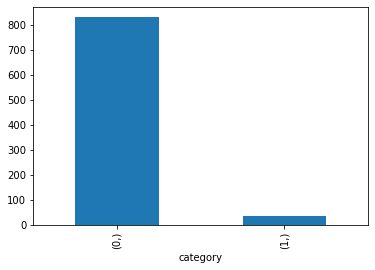

category
0           831
1            35
dtype: int64


In [22]:
Predicted_Y = pd.DataFrame(y_pred)
Predicted_Y.columns = ['category']

Predicted_Y.value_counts().plot.bar()
plt.show()
print(Predicted_Y.value_counts())

In [23]:
# Write Final preds
Predicted_Y.to_csv("./submission.csv", index=False)